In [181]:
from evaldet import Tracks, MOTMetrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [182]:

#gt_tracks = Tracks.from_mot('./DATA/output_4_gt.txt')
gt_tracks = Tracks.from_mot('./DATA/minut_annotations.txt')

### ¡¡¡FILES USING GT TRACKS AS THE BASE!!! ###
#tracks = Tracks.from_mot('./OUTPUT/reid_test_00025/results.txt')                           # 0.59 (LocA=1) (--thr=0.00025)

### ¡¡¡FILES USING THE SAME DETECTIONS USED FOR GENERATING THE GROUND TRUTH!!! ###
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_16163.txt')                    # 0.87 (LocA=1)
#tracks = Tracks.from_mot('./OUTPUT/results_preds_deepocsort.txt')                          # 0.81 (LocA=1)

### ¡¡¡FILES USING THE DETECTIONS USED AS A BASE FOR THE GROUND TRUTH!!! ###
#tracks = Tracks.from_mot('./OUTPUT/minut_fgbg_ocsort_trck.txt')                            # 0.28 (LocA=0.65)
tracks = Tracks.from_mot('./OUTPUT/minut_fgbg_deepocsort_trck.txt')                        # 0.64 (LocA=0.93)

### FILES USING KALMAN PREDICTIONS (AND SAME DETECTIONS) ###
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman.txt')                   # 0.41 (LocA=0.68)
#tracks = Tracks.from_mot('./OUTPUT/output_4_kalman_pca.txt')                               # 0.41 (LocA=0.68)

### FILES USING NEW DETECTORS WITH THIS DATA INCLUDED ###
#tracks = Tracks.from_mot('./OUTPUT/minut_yolo_ocsort_trck.txt')                            # 0.18 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/minut_post_yolo_ocsort_trck.txt')                       # 0.23 (LocA=0.68)
#tracks = Tracks.from_mot('./OUTPUT/minut_post_yolo_deepocsort_trck.txt')                   # 0.26 (LocA=0.71)

### FILES USING NEW DETECTORS WITH THIS DATA INCLUDED ###
# TODO: Minut using yolo & OCSORT
# TODO: Minut using yolo & DeepOCSORT

### FILES USING NEW DETECTORS ###
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_320_v2.txt')                 # 0.04 (LocA=0.58)
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_08.txt')                 # 0.09 (LocA=0.59)
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_09.txt')                 # 0.14 (LocA=0.64)
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_12.txt')                 # 0.005 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_08.txt')       # 0.09 (LocA=0.59)
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_09.txt')       # 0.23 (LocA=0.64)
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_12.txt')       # 0.006 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_08.txt')       # 0.09 (LocA=0.59)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09.txt')       # 0.23 (LocA=0.64) (--trackThreshold=0.4 --iouThreshold=0.2 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_12.txt')       # 0.006 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v2.txt')    # 0.24 (LocA=0.64) (--trackThreshold=0.2 --iouThreshold=0.3 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v3.txt')    # 0.22 (LocA=0.64) (--trackThreshold=0.6 --iouThreshold=0.1 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v4.txt')    # 0.23 (LocA=0.64) (--trackThreshold=0.1 --iouThreshold=0.5 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v5.txt')    # 0.24 (LocA=0.64) (--trackThreshold=0.4 --iouThreshold=0.3 --associationFunc=ciou)



eval_obj = MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [183]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [184]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
        MOTP  MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.93  0.84       243       815    11
----------
IDs
        IDTP  IDFP  IDFN   IDP   IDR  IDF1
values  3843  2325  2897  0.62  0.57   0.6
----------
HOTA
        HOTA  DetA  AssA  LocA
values  0.64  0.81   0.5  0.93


In [185]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05           0.21           0.23           0.19           0.96
0.10           0.61           0.74           0.51           0.95
0.15           0.62           0.75           0.51           0.95
0.20           0.62           0.75           0.51           0.95
0.25           0.62           0.76           0.51           0.95
0.30           0.62           0.78           0.50           0.94
0.35           0.63           0.79           0.50           0.94
0.40           0.64           0.81           0.50           0.94
0.45           0.65           0.83           0.50           0.93
0.50           0.65           0.85           0.50           0.93
0.55           0.66           0.87           0.51           0.92
0.60           0.67           0.88           0.51           0.92
0.65           0.68           0.90           0.52           0.91
0.70           0.69           0.91           0.53           0.91
0.7

(0.0, 1.0)

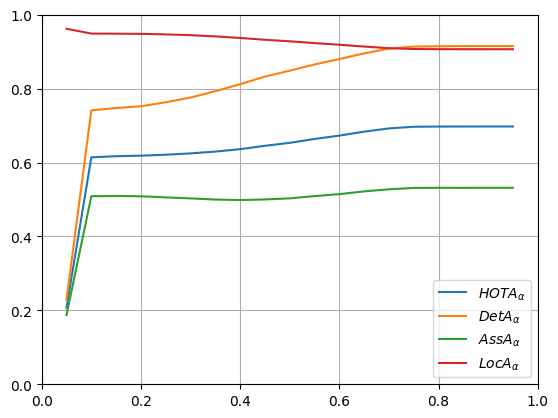

In [186]:
fig = hota_alpha.plot.line()
fig.grid(True)
fig.set_xlim(0, 1)
fig.set_ylim(0, 1)